<a href="https://colab.research.google.com/github/datawithkhushboo/Beer-Case-Study/blob/main/Beer_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name = Khushboo Chaurasiya





#**Problem Statement**

>**Our objective is to build a Machine Learning model which predicts the overall rating of the beer**.


![image](https://boomelomedia.com/wp-content/uploads/2021/07/Blog-thumbnails-2-1-1024x576.jpg)

#Data Fields

● Index - an identifier for the review

● beer/ABV - the alcohol by volume of the beer

● beer/beerId - a unique ID indicating the
beer reviewed

● beer/brewerId - a unique ID indicating the brewery

● beer/name - name of the beer

● beer/style

● review/appearance - rating of the beer's appearance (1.0 to 5.0)

● review/aroma - rating of the beer's aroma (1.0 to 5.0)

● review/overall - rating of the beer overall (1.0 to 5.0)

● review/palate - rating of the beer's palate (1.0 to 5.0)

● review/taste - rating of the beer's taste (1.0 to 5.0)

● review/text - the text of the review

● review/timeStruct - a dict specifying when the review was submitted

● review/time Unix

● user/ageInSeconds - age of the user in seconds

● user/birthday Raw

● user/birthday Unix

● user/gender - gender of the user (if specified)

● user/profile Name - profile name of the user


#Import Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timezone
import time
from datetime import datetime
import statistics as st
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing,model_selection, metrics
import xgboost as xgb
nltk.download('punkt')
from pandas.api.types import CategoricalDtype

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('drive/MyDrive/Beer-Case Study/train.csv')


In [ ]:
df.sample(5)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
23026,20723,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.5,4.5,5.0,4.5,5.0,"Appearance: Poured a nice black color, with gr...","{'min': 33, 'hour': 21, 'mday': 18, 'sec': 53,...",1232314433,1.017673e+09,"Sep 12, 1982",400662000.0,Male,krisandajt
9850,1060,3.5,436,163,Amstel Light,Light Lager,2.0,2.0,3.0,2.0,2.5,"Well it's time to review another ""regular"" bee...","{'min': 35, 'hour': 1, 'mday': 26, 'sec': 34, ...",1217036134,NaN,NaN,NaN,NaN,Reagan1984
35241,20941,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.0,4.5,4.0,4.0,4.0,"Tried this one on tap at Moe's Tavern in Lee, ...","{'min': 11, 'hour': 2, 'mday': 18, 'sec': 52, ...",1224295912,NaN,NaN,NaN,NaN,HopEnthusiast
633,22183,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.5,4.5,3.5,4.0,4.5,Served from tap to 12.oz snifter (Should have ...,"{'min': 7, 'hour': 17, 'mday': 4, 'sec': 11, '...",1291482431,NaN,NaN,NaN,NaN,Brewmeist
28479,23211,8.5,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,3.5,3.5,Poured from a bottle dated 5/24/11 into a Noni...,"{'min': 20, 'hour': 22, 'mday': 16, 'sec': 47,...",1313533247,NaN,NaN,NaN,NaN,DrewV


# **Understand the Data**

In [ ]:
 df.shape

(37500, 19)


**shape of the Data**
> Row = 37500

> Columns = 19

In [ ]:
df.duplicated().sum()

0

There is no dublicate values in the data

In [ ]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

 Null values exists in following fields



---




 >review/text     -      10


>user/ageInSeconds   -      29644

>user/birthdayRaw     -   29644

>user/birthdayUnix     -  29644

>user/gender            -  22186

> user/profileName       - 5




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

 there are some columns which are not in proper data type

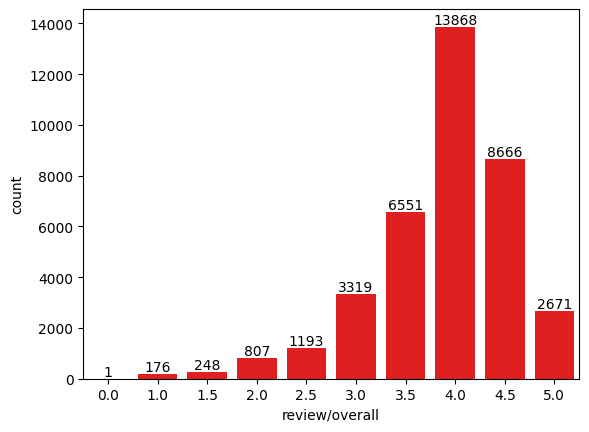

In [ ]:
#checking data is imbalance or not
ax = sns.countplot(x = 'review/overall',data =df, color='red')
for i in ax.containers:
  ax.bar_label(i)
plt.show()


Imbalanced Data


> Maximum rating = 4

> Minimum Rating = 0

# Data Cleaning



### Handle  wrong format  and null values

In [ ]:
df['user/birthdayRaw'] = pd.to_datetime(df['user/birthdayRaw'],errors='coerce')

In [ ]:
sg = df[df['user/birthdayRaw'].notnull()]

In [ ]:
c=[]
for i in sg['user/birthdayRaw']:
  c.append(time.mktime(i.timetuple()))

def Average(lst):
    return sum(lst) / len(lst)
mean =  Average(c)

In [ ]:
df['user/ageInSeconds'].fillna(df['user/ageInSeconds'].median(), inplace=True)
df['user/birthdayRaw'].fillna(mean, inplace=True)
df['user/birthdayUnix'].fillna(df['user/birthdayUnix'].median(), inplace=True)
df['user/gender'].fillna('missing', inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,1.100009e+09,241603445.621181,318326400.0,missing,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,1.100009e+09,241603445.621181,318326400.0,missing,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,1.100009e+09,241603445.621181,318326400.0,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,1976-08-10 00:00:00,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,1.100009e+09,241603445.621181,318326400.0,missing,Brewbro000


In [ ]:
df.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64

In [ ]:
df.reset_index(inplace=True)

# **Data Preprocessing**




````

Question - How can you use "beer/name", "beer/style" and "review/text" as features to predict the overall
rating of the beer ?


 ````




---

````
Ans-1 Using Text Preprocessing

````



######Text Preprocessing

In [ ]:
df.head()

,level_0,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,1.100009e+09,241603445.621181,318326400.0,missing,RblWthACoz
1,1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,1.100009e+09,241603445.621181,318326400.0,missing,BeerSox
2,2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,1.100009e+09,241603445.621181,318326400.0,Male,mschofield
3,3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,1976-08-10 00:00:00,208508400.0,Male,molegar76
4,4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,1.100009e+09,241603445.621181,318326400.0,missing,Brewbro000


In [ ]:

ps = PorterStemmer()


def conv(data,col):
  corpus = []
  for i in range(0, len(data)):
      review = re.sub('[^a-zA-Z]', ' ', data[col][i])
      review = review.lower()
      review = review.split()
      review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  return corpus

In [ ]:
beerNames = conv(df,'beer/name')
df['clean_beerNames'] = beerNames
df.drop('beer/name',axis=1,inplace=True)

In [ ]:
beerTypes = conv(df,'beer/style')
df['clean_beerTypes'] = beerTypes
df.drop('beer/style',axis=1,inplace=True)

In [ ]:
beernames = df['clean_beerNames'].value_counts()
print('Number of beer names are : {0}'.format(len(beernames)))
print(beernames[beernames > 500])

Number of beer names are : 1671
founder breakfast stout                1882
founder kb kentucki breakfast stout    1438
founder centenni ipa                   1063
founder red rye pa                     1051
founder dirti bastard                   983
pilsner urquel                          948
founder doubl troubl                    857
founder imperi stout                    805
founder devil dancer                    799
founder backwood bastard                778
founder porter                          675
founder nemesi                          670
aecht schlenkerla rauchbier rzen        665
b r crusher oatmeal imperi stout        635
founder curmudgeon old ale              574
stoudt doubl ipa india pale ale         538
Name: clean_beerNames, dtype: int64


In [ ]:
df.head(5)

,level_0,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,clean_beerNames,clean_beerTypes
0,0,40163,5.0,46634,14338,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,1.100009e+09,241603445.621181,318326400.0,missing,RblWthACoz,chiostro,herb spice beer
1,1,8135,11.0,3003,395,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,1.100009e+09,241603445.621181,318326400.0,missing,BeerSox,beard pat barleywin,american barleywin
2,2,10529,4.7,961,365,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,1.100009e+09,241603445.621181,318326400.0,Male,mschofield,naughti nelli ale,american pale ale apa
3,3,44610,4.4,429,1,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,1976-08-10 00:00:00,208508400.0,Male,molegar76,pilsner urquel,czech pilsen
4,4,37062,4.4,4904,1417,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,1.100009e+09,241603445.621181,318326400.0,missing,Brewbro000,black sheep ale special,english pale ale


In [ ]:
beerNameList = []
for i in range(16):
  beerNameList.append(beernames.index[i])
print(beerNameList)

['founder breakfast stout', 'founder kb kentucki breakfast stout', 'founder centenni ipa', 'founder red rye pa', 'founder dirti bastard', 'pilsner urquel', 'founder doubl troubl', 'founder imperi stout', 'founder devil dancer', 'founder backwood bastard', 'founder porter', 'founder nemesi', 'aecht schlenkerla rauchbier rzen', 'b r crusher oatmeal imperi stout', 'founder curmudgeon old ale', 'stoudt doubl ipa india pale ale']


In [ ]:
beertype = df['clean_beerTypes'].value_counts()
print('Number of beer types are : {0}'.format(len(beertype)))
print(beertype[beertype > 500])

Number of beer types are : 95
american doubl imperi stout        4490
american ipa                       3048
american doubl imperi ipa          2871
scotch ale wee heavi               2133
russian imperi stout               2030
american pale ale apa              1711
american porter                    1687
rauchbier                          1462
rye beer                           1355
czech pilsen                       1130
fruit veget beer                   1021
english pale ale                    971
old ale                             783
doppelbock                          669
american barleywin                  634
euro pale lager                     522
extra special strong bitter esb     505
Name: clean_beerTypes, dtype: int64


In [ ]:
beerTypeList = []
for i in range(17):
  beerTypeList.append(beertype.index[i])
print(beerTypeList)

['american doubl imperi stout', 'american ipa', 'american doubl imperi ipa', 'scotch ale wee heavi', 'russian imperi stout', 'american pale ale apa', 'american porter', 'rauchbier', 'rye beer', 'czech pilsen', 'fruit veget beer', 'english pale ale', 'old ale', 'doppelbock', 'american barleywin', 'euro pale lager', 'extra special strong bitter esb']


In [ ]:


df.clean_beerNames= df.clean_beerNames.astype(CategoricalDtype(categories=beerNameList))

In [ ]:
df.clean_beerTypes= df.clean_beerTypes.astype(CategoricalDtype(categories=beerTypeList))

In [ ]:
beertext = conv(df,'review/text')
df['clean_beerText'] = beertext
df.drop('review/text',axis=1,inplace=True)

In [ ]:
beerId = df['beer/beerId'].value_counts()
print('Number of beer ids are : {0}'.format(len(beerId)))
print(beerId[beerId > 500])

Number of beer ids are : 1731
11757    1882
19960    1438
5441     1063
16074    1051
7463      983
429       946
34146     857
21822     805
17538     799
35036     778
7348      675
727       665
33644     635
24905     574
20470     538
Name: beer/beerId, dtype: int64


In [ ]:
beerIdList = []
for i in range(15):
  beerIdList.append(beerId.index[i])
print(beerIdList)

[11757, 19960, 5441, 16074, 7463, 429, 34146, 21822, 17538, 35036, 7348, 727, 33644, 24905, 20470]


In [ ]:
df['beer/beerId']= df['beer/beerId'].astype(CategoricalDtype(categories=beerIdList))

In [ ]:
brewerId = df['beer/brewerId'].value_counts()
print('Number of brewer ids are : {0}'.format(len(brewerId)))
print(brewerId[brewerId > 500])


Number of brewer ids are : 212
1199     14968
394       2936
14879     2349
263       1809
3268      1277
395       1225
365       1069
1         1016
1417       908
14         834
568        785
1075       666
1315       601
Name: beer/brewerId, dtype: int64


In [ ]:
brewerIdList = []
for i in range(15):
  brewerIdList.append(brewerId.index[i])
print(brewerIdList)

[1199, 394, 14879, 263, 3268, 395, 365, 1, 1417, 14, 568, 1075, 1315, 9020, 60]


In [ ]:
df['beer/brewerId']= df['beer/brewerId'].astype(CategoricalDtype(categories=brewerIdList))

In [ ]:
df.drop(['level_0', 'index','review/timeStruct','user/profileName','user/birthdayRaw'],axis=1,inplace=True)

######Check Correlations

<ipython-input-37-8a86e50fe70c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


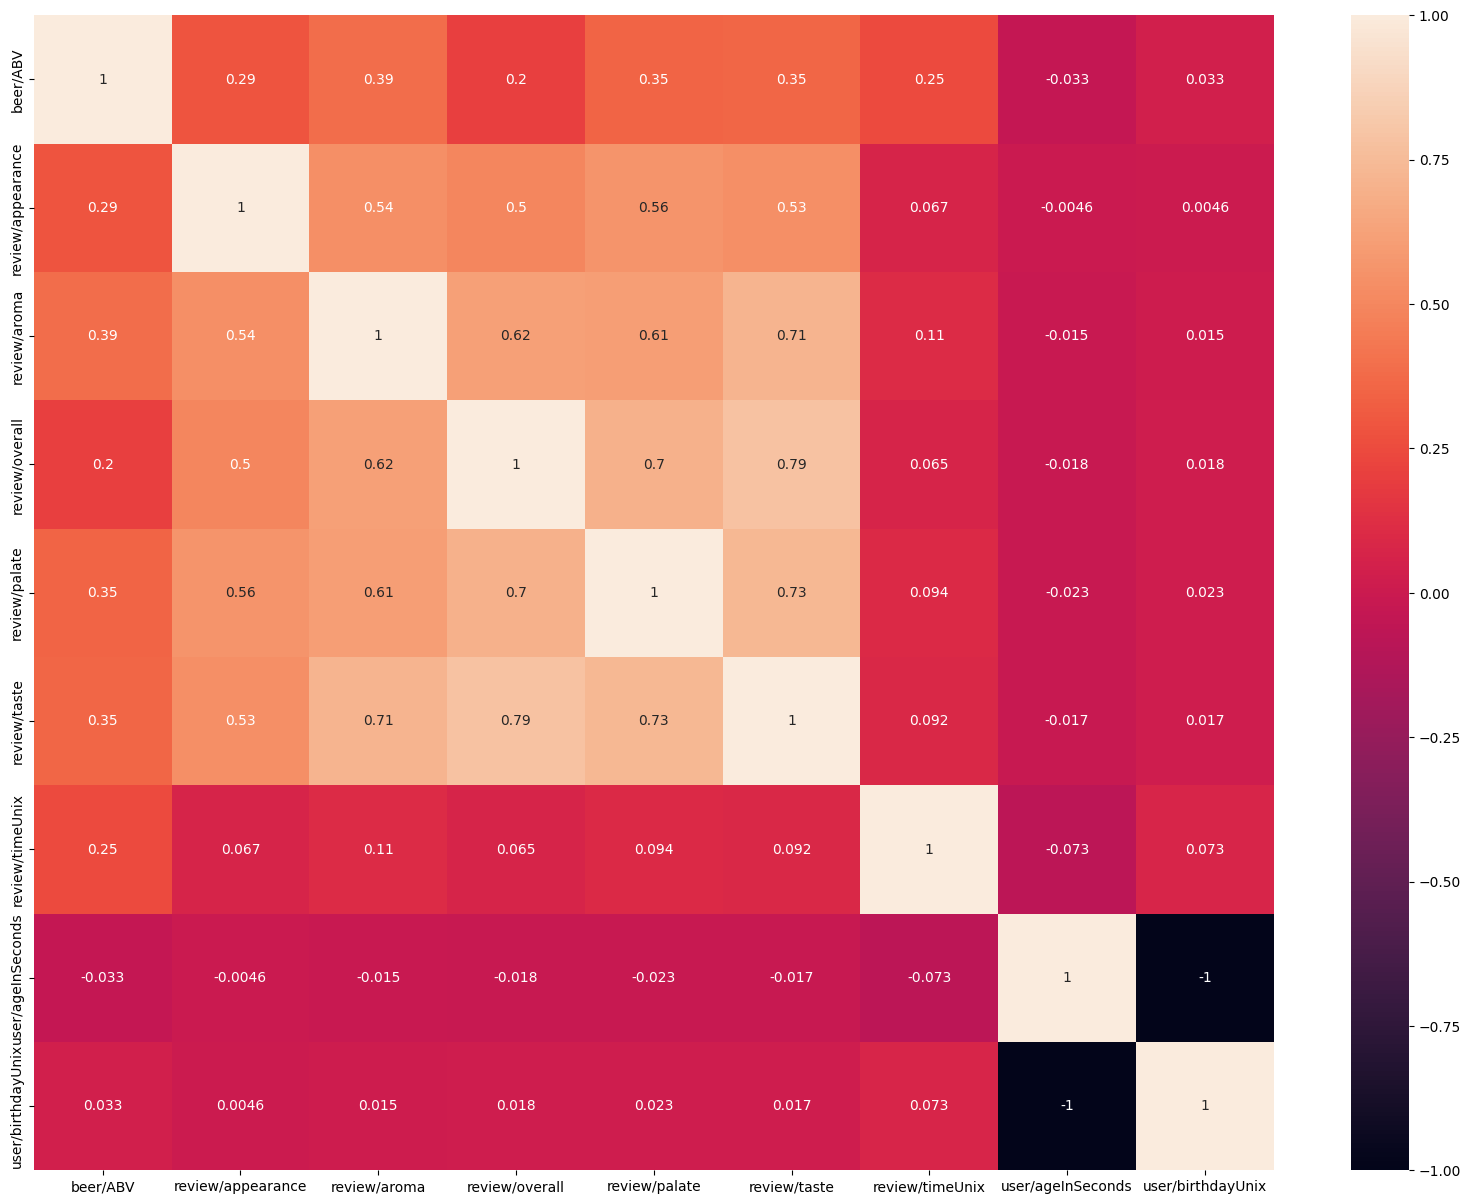

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df['beer/brewerId'] = df['beer/brewerId'].cat.add_categories('0')
df['beer/brewerId'].fillna('0', inplace=True)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

######Train Test Split

In [ ]:
df.head(2)

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender,clean_beerNames,clean_beerTypes,clean_beerText
0,5.0,NaN,394,4.0,4.0,4.5,3.5,4.5,1077558434,1.032876e+09,385459200.0,Male,NaN,extra special strong bitter esb,beer great feel drink defiantli best esb yet e...
1,5.0,NaN,394,3.5,4.5,4.0,3.5,4.0,1221196802,1.100009e+09,318326400.0,Male,NaN,NaN,light crystal clear copper color medium head w...


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

beer/ABV             0
beer/beerId          0
beer/brewerId        0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayUnix    0
user/gender          0
clean_beerNames      0
clean_beerTypes      0
clean_beerText       0
dtype: int64

In [ ]:
independent_variable = df.columns
dependent_variable = 'review/overall'


In [ ]:
x = df[independent_variable]
y = df[dependent_variable]

In [ ]:
x_train, x_test,y_train, y_test  = train_test_split(x,y,test_size=0.3,random_state = 42)

######Vectorise Numerical Features


In [ ]:
def numerical_vectorizations(m,o):

    scalars = StandardScaler()
    scalars.fit(m.values.reshape(-1,1))
    print(f"Mean : {scalars.mean_[0]}, Standard deviation : {np.sqrt(scalars.var_[0])}")

    standardized_train = scalars.transform(m.values.reshape(-1, 1))
    standardized_test = scalars.transform(o.values.reshape(-1, 1))
    return standardized_train,standardized_test


In [ ]:
std_train_1 ,std_test_1 = numerical_vectorizations(x_train['beer/ABV'],x_test['beer/ABV'])


Mean : 8.603391776247129, Standard deviation : 2.079699308521987


In [ ]:
x_train['beer/beerId']= pd.to_numeric(x_train['beer/beerId'], errors='coerce')
x_test['beer/beerId']= pd.to_numeric(x_test['beer/beerId'], errors='coerce')

std_train_2 ,std_test_2 = numerical_vectorizations(x_train['beer/beerId'],x_test['beer/beerId'])


Mean : 16203.198288457525, Standard deviation : 10628.939057150288


In [ ]:
x_train['beer/brewerId']= pd.to_numeric(x_train['beer/brewerId'], errors='coerce')
x_test['beer/brewerId']= pd.to_numeric(x_test['beer/brewerId'], errors='coerce')

std_train_3 ,std_test_3 = numerical_vectorizations(x_train['beer/brewerId'],x_test['beer/brewerId'])


Mean : 1667.7745773324984, Standard deviation : 2922.3898668779984


In [ ]:
x_train['review/appearance']= pd.to_numeric(x_train['review/appearance'], errors='coerce')
x_test['review/appearance']= pd.to_numeric(x_test['review/appearance'], errors='coerce')

std_train_4 ,std_test_4 = numerical_vectorizations(x_train['review/appearance'],x_test['review/appearance'])


Mean : 4.104675433103736, Standard deviation : 0.4994267785552417


In [ ]:
x_train['review/aroma']= pd.to_numeric(x_train['review/aroma'], errors='coerce')
x_test['review/aroma']= pd.to_numeric(x_test['review/aroma'], errors='coerce')

std_train_5 ,std_test_5 = numerical_vectorizations(x_train['review/aroma'],x_test['review/aroma'])


Mean : 4.1559173450219165, Standard deviation : 0.560804901924984


In [ ]:
x_train['review/palate']= pd.to_numeric(x_train['review/palate'], errors='coerce')
x_test['review/palate']= pd.to_numeric(x_test['review/palate'], errors='coerce')

std_train_6 ,std_test_6 = numerical_vectorizations(x_train['review/palate'],x_test['review/palate'])


Mean : 4.124399916510123, Standard deviation : 0.5443889701455262


In [ ]:
x_train['review/taste']= pd.to_numeric(x_train['review/taste'], errors='coerce')
x_test['review/taste']= pd.to_numeric(x_test['review/taste'], errors='coerce')

std_train_7 ,std_test_7 = numerical_vectorizations(x_train['review/taste'],x_test['review/taste'])


Mean : 4.221978710081403, Standard deviation : 0.5719794004411328


In [ ]:
x_train['review/timeUnix']= pd.to_numeric(x_train['review/timeUnix'], errors='coerce')
x_test['review/timeUnix']= pd.to_numeric(x_test['review/timeUnix'], errors='coerce')

std_train_8 ,std_test_8 = numerical_vectorizations(x_train['review/timeUnix'],x_test['review/timeUnix'])


Mean : 1242101537.222605, Standard deviation : 63495952.22203776


In [ ]:
x_train['user/ageInSeconds']= pd.to_numeric(x_train['user/ageInSeconds'], errors='coerce')
x_test['user/ageInSeconds']= pd.to_numeric(x_test['user/ageInSeconds'], errors='coerce')

std_train_9 ,std_test_9 = numerical_vectorizations(x_train['user/ageInSeconds'],x_test['user/ageInSeconds'])



Mean : 1106966662.058756, Standard deviation : 143918696.64551622


In [ ]:
x_train['user/birthdayUnix']= pd.to_numeric(x_train['user/birthdayUnix'], errors='coerce')
x_test['user/birthdayUnix']= pd.to_numeric(x_test['user/birthdayUnix'], errors='coerce')

std_train_10 ,std_test_10 = numerical_vectorizations(x_train['user/birthdayUnix'],x_test['user/birthdayUnix'])


Mean : 311368784.97182214, Standard deviation : 143918696.65019366


######Vectorise Categorical Features

In [ ]:
from collections import Counter

def categorical_vectorization(m,o):


    my_counter = Counter()
    for word in m.values:
        my_counter.update(str(word).split())
    category_dict = dict(my_counter)
    sorted_dict = dict(sorted(category_dict.items(), key=lambda kv: kv[1]))


    vectorizer = CountVectorizer(vocabulary=list(sorted_dict.keys()), lowercase=False, binary=True)
    vectorizer.fit(m.values)


    one_hot_train = vectorizer.transform(m.values)
    one_hot_test = vectorizer.transform(o.values)
    return one_hot_train, one_hot_test

In [ ]:
std_train_11 ,std_test_11 = categorical_vectorization(x_train['user/gender'],x_test['user/gender'])


In [ ]:
x_train['clean_beerNames'] = x_train['clean_beerNames'].cat.add_categories('missing')
x_test['clean_beerNames'] = x_test['clean_beerNames'].cat.add_categories('missing')

x_train['clean_beerNames'].fillna('missing', inplace=True)
x_test['clean_beerNames'].fillna('missing', inplace=True)

x_train['clean_beerTypes'] = x_train['clean_beerTypes'].cat.add_categories('missing')
x_test['clean_beerTypes'] = x_test['clean_beerTypes'].cat.add_categories('missing')

x_train['clean_beerTypes'].fillna('missing', inplace=True)
x_test['clean_beerTypes'].fillna('missing', inplace=True)

In [ ]:
preprocessed_beerNames_tr = []
for i in x_train['clean_beerNames']:
  preprocessed_beerNames_tr.append(i.replace(' ','_'))

preprocessed_beerNames_te = []
for i in x_test['clean_beerNames']:
  preprocessed_beerNames_te.append(i.replace(' ','_'))

In [ ]:
preprocessed_beerTypes_tr = []
for i in x_train['clean_beerTypes']:
  preprocessed_beerTypes_tr.append(i.replace(' ','_'))

preprocessed_beerTypes_te = []
for i in x_test['clean_beerTypes']:
  preprocessed_beerTypes_te.append(i.replace(' ','_'))

In [ ]:
x_train['clean_beerNames_processed'] = preprocessed_beerNames_tr
x_train.drop('clean_beerNames',axis=1,inplace=True)

x_test['clean_beerNames_processed'] = preprocessed_beerNames_te
x_test.drop('clean_beerNames',axis=1,inplace=True)

x_train['clean_beerTypes_processed'] = preprocessed_beerTypes_tr
x_train.drop('clean_beerTypes',axis=1,inplace=True)

x_test['clean_beerTypes_processed'] = preprocessed_beerTypes_te
x_test.drop('clean_beerTypes',axis=1,inplace=True)

In [ ]:
std_train_12 ,std_test_12 = categorical_vectorization(x_train['clean_beerNames_processed'],x_test['clean_beerNames_processed'])


In [ ]:
std_train_13 ,std_test_13 = categorical_vectorization(x_train['clean_beerTypes_processed'],x_test['clean_beerTypes_processed'])


######Vectorise Text Features

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=5000,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(x_train['clean_beerText']) + list(x_test['clean_beerText']))
std_train_14 =  tfv.transform(x_train['clean_beerText'])
std_test_14 = tfv.transform(x_test['clean_beerText'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [ ]:
X_tr = hstack((std_train_1,std_train_2,std_train_3,std_train_4,std_train_5,std_train_6,std_train_7,std_train_8,std_train_9,std_train_10,std_train_11,std_train_12,std_train_13,std_train_14)).tocsr()
X_te = hstack((std_test_1,std_test_2,std_test_3,std_test_4,std_test_5,std_test_6,std_test_7,std_test_8,std_test_9,std_test_10,std_test_11,std_test_12,std_test_13,std_test_14)).tocsr()

In [ ]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape,y_test.shape)

Final Data matrix
(9582, 5038) (9582,)
(4107, 5038) (4107,)


In [ ]:
y_train_enc=np.array(list(y_train))
y_test_enc=np.array(list(y_test))

# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



# initialize Our first RandomForestRegressor model
regr2 = RandomForestRegressor(max_features='sqrt')

# declare parameters for hyperparameter tuning
parameters = {'n_estimators':[100,300,500,700],'max_depth':[1,3,5]}

# Perform cross validation
clf = GridSearchCV(regr2,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train_enc)

# Summarize results
print(result.best_params_)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 5, 'n_estimators': 700}


In [ ]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=500)
rfr.fit(X_tr, y_train_enc)

RandomForestRegressor(max_depth=5, n_estimators=500)

In [ ]:

predict_target = rfr.predict(X_te)


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, predict_target)

print(coefficient_of_dermination)

0.548209185214789


# Xgboost

In [ ]:
import xgboost as xgb

# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)

# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.01,0.1],'n_estimators':[200,300,500],'max_depth':[1,2,3]}

# Perform cross validation
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv=2,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train_enc)

# Summarize results
print(result.best_params_)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[18:33:30] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [ ]:
xgb1 = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 2, n_estimators= 300)
xgb1.fit(X_tr, y_train_enc)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


predict_target = xgb1.predict(X_te)




In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, predict_target)

print(coefficient_of_dermination)

# Conclusions

In [ ]:
evaluation = pd.DataFrame()
evaluation['RandomForest'] = [round((0.5250710756390778*100),2)]
evaluation['Xgboost'] = [round((0.5717921829709902*100),2)]

In [ ]:
evaluation.plot(kind='bar')